In [30]:
from functions3 import *
from multiprocessing import Pool
import glob
import numpy as np
import datetime
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

In [33]:
%config Completer.use_jedi = False

In [2]:
%%time
if __name__ == "__main__":
    pool = Pool(24)
    df = pool.map(read_multicore, glob.glob("Processed_Data/0_Tedros/*.pkl"))
    pool.close()
    pool.join()
    df = pd.concat(df)

Wall time: 40.5 s


In [3]:
df = df[["tweetid", "screen_name", "date", "text", "country", "state", 'rt_screen', 'rt_userid']]
df["processed_text"] = df.text.str.lower()

In [4]:
df = df[df.rt_userid == 189868631.0]
df["kpop"] = df.processed_text.apply(lambda x: ("bts" in x) or ("sjofficial" in x) )

In [5]:
df[ ~df.kpop ].text.value_counts().shape

(2144,)

In [6]:
THRESH = 14
# NO_KPOP_COUNTR = df[~df.kpop].country.value_counts()[:THRESH].index
# CNTRYS = set(KPOP_COUNTR) | set(NO_KPOP_COUNTR)

In [7]:
KPOP = df[df.kpop].country.value_counts().reset_index()
KPOP.columns = ["country", "num"]
KPOP_COUNTR = KPOP.country.values[:THRESH]
KPOP["prop"] = KPOP.num / KPOP.num.sum()

NO_KPOP = df[~df.kpop].country.value_counts().reset_index()
NO_KPOP.columns = ["country", "num"]
NO_KPOP["prop"] = NO_KPOP.num / NO_KPOP.num.sum()

In [13]:
NO_KPOP.num.sum()

92393

In [8]:
x = KPOP.country.values[:THRESH]
NO_KPOP_BAR = NO_KPOP[ NO_KPOP.country.isin(x) ]
NO_KPOP_BAR = NO_KPOP_BAR.set_index('country').loc[x].reset_index()

In [28]:
x[0] = "USA"
x[10] = "UK"

In [19]:
list( KPOP.prop.values[:THRESH] )

[0.14444581737303844,
 0.08874953663659953,
 0.07095638205856913,
 0.06737303842827135,
 0.05866180649944396,
 0.05637588039046089,
 0.05504757197578154,
 0.03703818114419869,
 0.03228098356604473,
 0.026535277400222414,
 0.020418880514024466,
 0.019553935499814653,
 0.01871988137896948,
 0.0185654269121463]

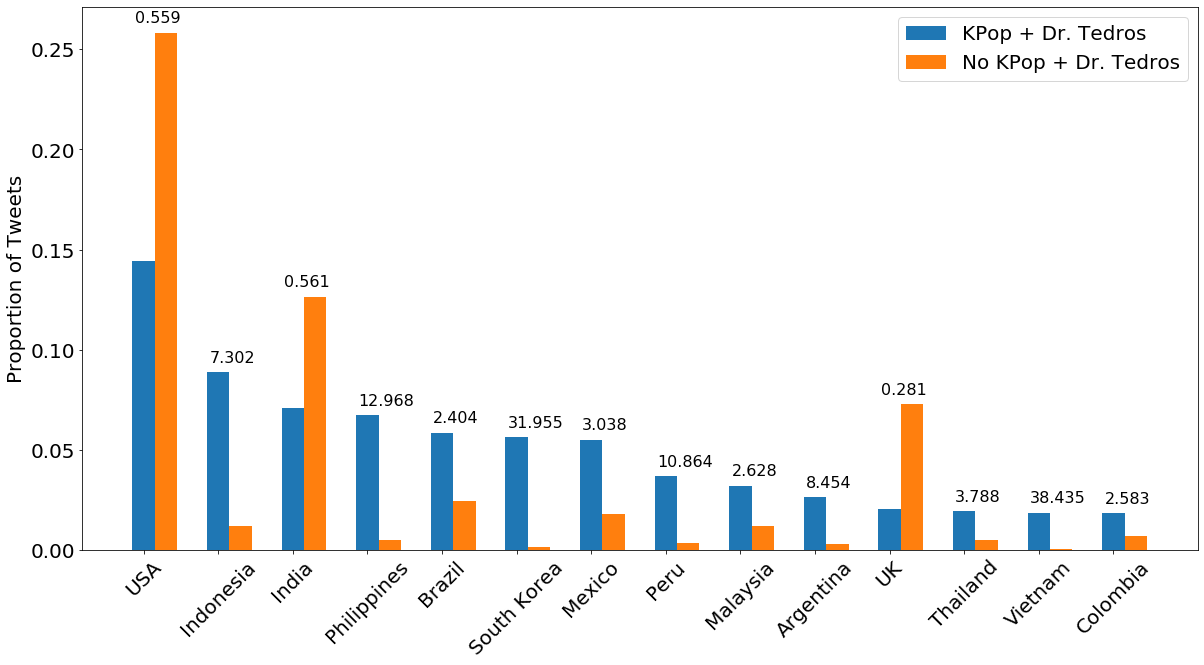

In [27]:
plt.figure(figsize=(20,10))
w = 0.3
plt.bar(np.arange(14), KPOP.prop.values[:THRESH], width=w, label="KPop + Dr. Tedros")
plt.bar(np.arange(14)+w, NO_KPOP_BAR.prop.values[:THRESH], width=w, label="No KPop + Dr. Tedros")
plt.xticks(np.arange(14), x, fontsize=20,rotation=45)
plt.legend(fontsize=20)

for i,v in enumerate(KPOP.prop.values[:THRESH] ):
    a = v
    b = NO_KPOP_BAR.prop.values[i]
    y = max((a,b))
    plt.annotate("{:.3f}".format(a/b), (i-0.12,y+0.005), fontsize=16)

plt.yticks(fontsize=20)
plt.ylabel("Proportion of Tweets", fontsize=20)
plt.savefig("figures/Disproportionate_Synergy.png", bbox_inches = "tight")

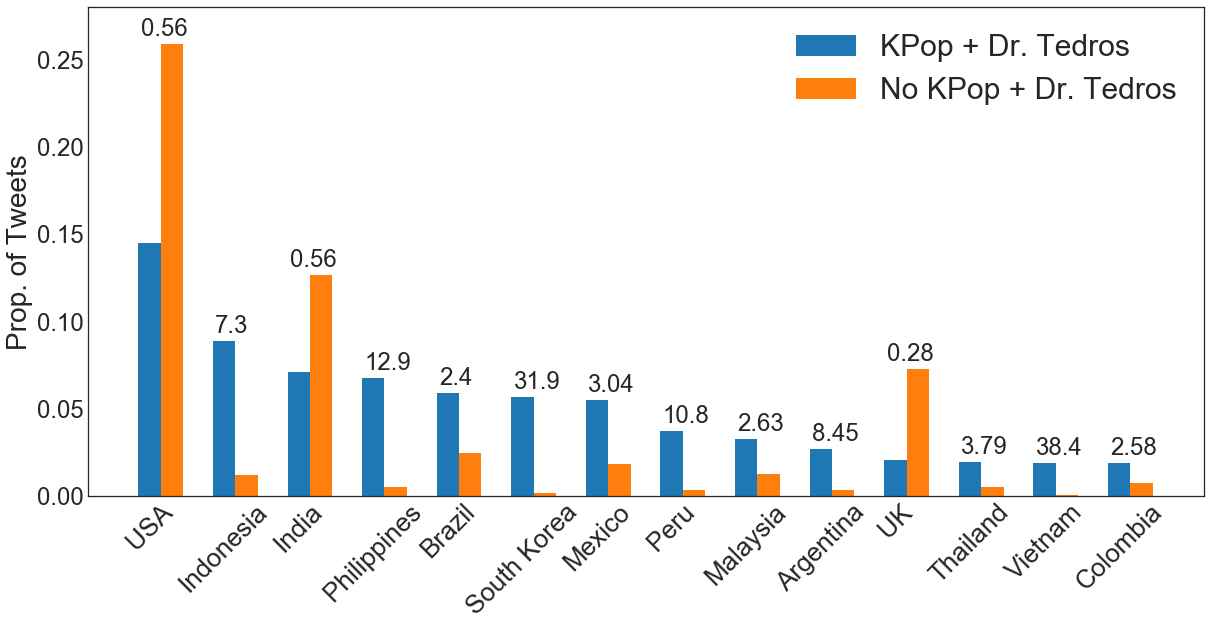

In [77]:
plt.figure(figsize=(20,9))
w = 0.3
plt.bar(np.arange(14), KPOP.prop.values[:THRESH], width=w, label="KPop + Dr. Tedros")
plt.bar(np.arange(14)+w, NO_KPOP_BAR.prop.values[:THRESH], width=w, label="No KPop + Dr. Tedros")
plt.xticks(np.arange(14), x, fontsize=26,rotation=45)
plt.legend(fontsize=30)

for i,v in enumerate(KPOP.prop.values[:THRESH] ):
    a = v
    b = NO_KPOP_BAR.prop.values[i]
    y = max((a,b))
#     plt.annotate("{:.2f}".format(a/b), (i-0.12,y+0.005), fontsize=24)
    plt.annotate("{}".format(round(a/b, 2))[:4], (i-0.12,y+0.005), fontsize=24)

plt.yticks(fontsize=24)
plt.ylabel("Prop. of Tweets", fontsize=28)
plt.ylim(0,0.28)
# plt.yscale("log")
plt.savefig("figures/Disproportionate_Synergy.png", bbox_inches = "tight")

In [34]:
matplotlib.style.use("seaborn-white")

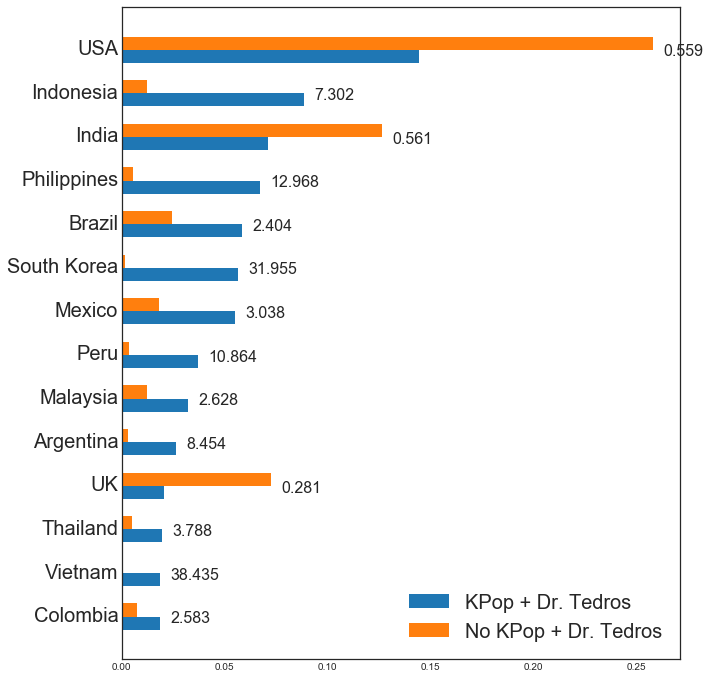

In [50]:
plt.figure(figsize=(10,12))
w = 0.3
plt.barh(np.arange(14), KPOP.prop.values[:THRESH][::-1], height=w, label="KPop + Dr. Tedros")
plt.barh(np.arange(14)+w, NO_KPOP_BAR.prop.values[:THRESH][::-1], height=w, label="No KPop + Dr. Tedros")
plt.yticks(np.arange(14)+0.2, x[::-1], fontsize=20)
plt.legend(fontsize=20)

for i,v in enumerate(KPOP.prop.values[:THRESH][::-1] ):
    a = v
    b = NO_KPOP_BAR.prop.values[::-1][i]
    y = max((a,b))
    plt.annotate("{:.3f}".format(a/b), (y+0.005,i), fontsize=16)

# plt.xticks(fontsize=20)
# plt.xlabel("Proportion of Tweets", fontsize=20)
# # plt.savefig("figures/Disproportionate_Synergy.png", bbox_inches = "tight")

## Health in General

In [16]:
%%time
if __name__ == "__main__":
    pool = Pool(24)
    df_H = pool.map(read_multicore, glob.glob("Processed_Data/0_Health/*.pkl"))
    pool.close()
    pool.join()
    df_H = pd.concat(df_H)

Wall time: 49.9 s


In [17]:
df_H = df_H[["tweetid", "screen_name", "date", "text", "country", "state", 'rt_screen', 'rt_userid']]
df_H["processed_text"] = df_H.text.str.lower()
df_H["kpop"] = df_H.processed_text.apply(lambda x: ("bts" in x) or ("sjofficial" in x) )

In [29]:
df_H.processed_text

2662     rt @who: #china🇨🇳 has reported to who 139 new ...
9570     rt @cdcgov: what are the symptoms of 2019 nove...
9583     rt @cdcgov: what are the symptoms of 2019 nove...
9624     rt @cdcgov: what are the symptoms of 2019 nove...
9635     rt @cdcgov: what are the symptoms of 2019 nove...
                               ...                        
77279    rt @hhsgov: reminder: if you live in the u.s.,...
79561    rt @cdcgov: 🌼 it’s allergy season. #covid19 &a...
79748    rt @tndeptofhealth: when you’re fully vaccinat...
79953    rt @who: media briefing on #covid19 with @drte...
80725    rt @who: 'the magic to make the #covid19 pande...
Name: processed_text, Length: 1559649, dtype: object

In [48]:
for i in df_H.rt_screen.unique():
    print(i)

WHO
CDCgov
Surgeon_General
TNDeptofHealth
TexasDSHS
IDPH
GaDPH
AZDHS
CAPublicHealth
NJDeptofHealth
nan
WADeptHealth
HRSAgov
HHSGov
OHdeptofhealth
CDCInjury
MassDPH
HealthyFla
DHSWI
NEDHHS
KDHE
scdhec
SeemaCMS
ncdhhs
mnhealth
HealthyLivingMo
LADeptHealth
PAHealthDept
CTDPH
msdh
ALPublicHealth
StateHealthIN
CAgovernor
IDHW
WV_DHHR
ADHPIO
_DCHealth
OHAOregon
dougducey
CDPHE
VDHgov
RIHEALTH
HawaiiDOH
samhsagov
healthvermont
MDHealthDept
NDDOH
SDDOH
GovAndyBeshear
HealthyOklahoma
NIH
Delaware_DHSS
MichiganHHS
NMDOH
HealthyBoston
HealthNYGov
DrTedros
FEMAregion3
SecCardona
CDCDirector
HHS_ASH
migov
APjdhanna
GovChrisSununu
NHDHHSPIO
CodmanHealth
StumpWVU
ACFHHS
AHRQNews
NCFarmBureau
US_FDA
distressline
WHCOVIDResponse
GovDunleavy
Alaska_DHSS
MarylandOPR
mndnr
GovofCO
UtahDepOfHealth
RideCARTA
211arizona
LaPlataCountyCO
HHSRegion7
GovMurphy
CHHSAgency
CA_OSG
PennsylvaniaGov
NC_Governor
RutgersBHS
WHOAFRO
MayorKimJaney
MassGov
IAPublicHealth
CCAPORG
THPFoundation
liveunitedri
GovLarryHogan
IKN

In [45]:
len( df_H[df_H.kpop] )/ (len( df_H[df_H.kpop] ) + len(df[df.kpop]))

0.0007702983578035872

In [62]:
KPOP_ST = df[df.kpop].state.value_counts().reset_index()